# Data Gathering

In [1]:
# web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scraps transcript data from specificly scrapsfromtheloft.com
# Go to website and inspect an element(ctrl+shift+c) 
# Highlight on your specific transcript data and in inspiction, the code for that data will be highlighted 

# DATA GATHERING Step
def get_transcript(url):
    
    page = requests.get(url).text # Using requests to get all the data from that url
    soup = BeautifulSoup(page,'lxml') # Telling pyhton that you want this doc as a html doc
    text = [p.text for p in soup.find(class_='post-content').find_all('p')] # finding that specific class (post-content) where out required transcript is located in the inspection. The pull out the text from those paragraphs (find_all('p'))  
    print(url)
    return text

# URLs of selected transcripts
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['Louis', 'Dave', 'Ricky', 'Bo', 'Bill', 'Jim', 'John', 'Hasan', 'Ali', 'Anthony', 'Mike', 'Joe']

In [2]:
# Scraping
transcripts = [get_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [3]:
# Pickling
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

A subdirectory or file transcripts already exists.


In [4]:

data = {} # Holds the text files. Every key is the name and evary value is the transcript.
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file) # Loading pickled files


In [5]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['Louis', 'Dave', 'Ricky', 'Bo', 'Bill', 'Jim', 'John', 'Hasan', 'Ali', 'Anthony', 'Mike', 'Joe'])

# Data Cleaning

In [6]:
#This function takes this transcript text and places into one large chunck of text in the form of list. 
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [7]:
# Combine it with key
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [8]:
data_combined

{'Louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, i

In [9]:
# Converting to pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

dataset = pd.DataFrame.from_dict(data_combined).transpose()
dataset.columns = ['transcript']
dataset = dataset.sort_index()
dataset

,transcript
Ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
Anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
Bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
Bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
Dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
Hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
Jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
Joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
John,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
Louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


# Cleaning Stages

##### Stage 1
1. Removing punctuations
2. Remove numbers and alphanumerics
3. Remove text in brackets

In [10]:
import re
import string

def stage_1(text):
    text = re.sub('\[.*?\]', '', text) # we can observe that some data is in brackets line [cheers and applause] for bill. So getting rid of the data in brackets.
    text = ''.join([word.lower() for word in text if word not in string.punctuation]) # Remove punctuations
    text = re.sub('\w*\d\w*', '', text) # Removing numbers and alpha numerics
    return text

stage1_cleaned = pd.DataFrame(dataset.transcript.apply(lambda x: stage_1(x)))
stage1_cleaned

,transcript
Ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
Anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
Bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
Bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
Dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
Hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
Jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
Joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
John,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
Louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


##### Stage 2
1. WE can observe that some of the quotes did not get removed and there are line breakers. 
2. Remove them by specifically mentioning the quotes and line breakers. 

In [11]:
def stage_2(text):
    text = re.sub('[‘’“”…]', '', text) # Removing quotes
    text = re.sub('\n', '', text) # Removing line breakers
    return text

stage2_cleaned = pd.DataFrame(stage1_cleaned.transcript.apply(lambda x: stage_2(x)))
stage2_cleaned

,transcript
Ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
Anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
Bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
Bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
Dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
Hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
Jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
Joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
John,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
Louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


##### Stage 3
1. Combining Stage 1 and Stage 2 cleaning for creating DTM
2. Tokenizing
3. Lammetizing
4. Removing Stop Words

In [12]:
# Combining round 1 and round 2 cleaning for countVectorizer
import re
import string
import nltk
wn = nltk.WordNetLemmatizer()

stop_words= nltk.corpus.stopwords.words('english')

def stage_3(text):
    #text = text.lower()
    text = re.sub('\[.*?\]', '', text) # we can observe that some data is in brackets line [cheers and applause] for bill. So getting rid of the data in brackets.
    text = ''.join([word.lower() for word in text if word not in string.punctuation]) # Remove punctuations
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuations
    text = re.sub('\w*\d\w*', '', text) # Removing numbers and alpha numerics
    text = re.sub('[‘’“”…]', '', text) # emoving quotes
    text = re.sub('\n', '', text) # Removing line breakers
    tokens = re.split('\W+',text) # tokenizing
    text = ' '.join([wn.lemmatize(i) for i in tokens if i not in stop_words]) # Lammetizing and removing stop words
    return text

stage3_cleaned = pd.DataFrame(dataset.transcript.apply(lambda x: stage_3(x)))
stage3_cleaned

,transcript
Ali,lady gentleman please welcome stage ali wong hi hello welcome thank thank coming hello hello gonna get shit cause pee like ten minute thank everyb...
Anthony,thank thank thank san francisco thank much good people surprised told em gonna tape special san francisco said would thats politically correct cit...
Bill,right thank thank much thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice dont know came june nice wasnt thinki...
Bo,bo old macdonald farm e e farm pig e e snort old macdonald farm e e bo burnham he year old he male look like genetic product giraffe sex ellen deg...
Dave,dave tell dirty joke living stare hard work happens signifies profound train thought alchemist fire transforms fear tragedy levity livelihood dave...
Hasan,whats davis whats im home bring back netflix said want special la chicago new york like nah son davis california um good year recently got marrie...
Jim,lady gentleman please welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh thats sweet love im end tour right im h...
Joe,lady gentleman welcome joe rogan fuck going san francisco thanks coming appreciate god damn put phone fuckface see bitch put phone motherfucker c...
John,right petunia wish luck die august thats pretty good right hello hello chicago nice see thank nice thank look youre wonderful crowd need keep ener...
Louis,introfade music let roll hold light light thank thank much appreciate dont necessarily agree appreciate much well nice place easily nicest place m...


In [13]:

# Let's add the comedians' full names as well
Comedian = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

dataset['Comedian'] = Comedian
dataset

,transcript,Comedian
Ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
Anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
Bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
Bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
Dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
Hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
Jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
Joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
John,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
Louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [14]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
vector = cv.fit_transform(stage3_cleaned['transcript'])
dtm = pd.DataFrame(vector.toarray(), columns=cv.get_feature_names())
dtm.index = stage3_cleaned.transcript.index
dtm


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,...,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
Ali,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
Anthony,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
Bill,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,2,1,0,0
Bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hasan,0,0,0,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
Jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
John,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
Louis,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0


In [16]:
# Read in the document-term matrix
import pandas as pd

dtmT = dtm.transpose()
dtmT.head()

,Ali,Anthony,Bill,Bo,Dave,Hasan,Jim,Joe,John,Louis,Mike,Ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in dtmT.columns:
    top = dtmT[c].sort_values(ascending=False).head(30) # sorting and picking top words
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Ali': [('like', 126),
  ('im', 74),
  ('know', 66),
  ('dont', 61),
  ('get', 42),
  ('shit', 35),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('woman', 27),
  ('ok', 26),
  ('lot', 25),
  ('go', 23),
  ('see', 21),
  ('oh', 21),
  ('would', 21),
  ('day', 21),
  ('gotta', 21),
  ('husband', 21),
  ('wanna', 21),
  ('time', 20),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('people', 16),
  ('pregnant', 15),
  ('need', 15),
  ('he', 14),
  ('dude', 14),
  ('asian', 14)],
 'Anthony': [('im', 60),
  ('like', 51),
  ('joke', 50),
  ('know', 39),
  ('one', 38),
  ('dont', 38),
  ('get', 38),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('go', 30),
  ('guy', 29),
  ('thing', 29),
  ('say', 28),
  ('anthony', 27),
  ('day', 27),
  ('people', 22),
  ('ever', 21),
  ('would', 20),
  ('tell', 19),
  ('grandma', 19),
  ('see', 19),
  ('shark', 19),
  ('time', 19),
  ('youre', 19),
  ('show', 18),
  ('right', 18),
  ('think', 17),
  ('dad', 16),
  ('kid', 16)],
 'Bill': [('l

In [18]:
top_dict = {}
for c in dtmT.columns:
    top = dtmT[c].sort_values(ascending=False).head(30) # sorting and picking top words
    top_dict[c]= list(zip(top.index, top.values)) # Here index is the word and value is the count of that word

top_dict

{'Ali': [('like', 126),
  ('im', 74),
  ('know', 66),
  ('dont', 61),
  ('get', 42),
  ('shit', 35),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('woman', 27),
  ('ok', 26),
  ('lot', 25),
  ('go', 23),
  ('see', 21),
  ('oh', 21),
  ('would', 21),
  ('day', 21),
  ('gotta', 21),
  ('husband', 21),
  ('wanna', 21),
  ('time', 20),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('people', 16),
  ('pregnant', 15),
  ('need', 15),
  ('he', 14),
  ('dude', 14),
  ('asian', 14)],
 'Anthony': [('im', 60),
  ('like', 51),
  ('joke', 50),
  ('know', 39),
  ('one', 38),
  ('dont', 38),
  ('get', 38),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('go', 30),
  ('guy', 29),
  ('thing', 29),
  ('say', 28),
  ('anthony', 27),
  ('day', 27),
  ('people', 22),
  ('ever', 21),
  ('would', 20),
  ('tell', 19),
  ('grandma', 19),
  ('see', 19),
  ('shark', 19),
  ('time', 19),
  ('youre', 19),
  ('show', 18),
  ('right', 18),
  ('think', 17),
  ('dad', 16),
  ('kid', 16)],
 'Bill': [('l

In [19]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print("{}'s top 15 words---> {}".format(comedian,', '.join([word for word, count in top_words[0:14]])))
    

Ali's top 15 words---> like, im, know, dont, get, shit, thats, youre, gonna, woman, ok, lot, go, see
Anthony's top 15 words---> im, like, joke, know, one, dont, get, got, said, thats, go, guy, thing, say
Bill's top 15 words---> like, right, im, know, dont, gonna, got, get, fucking, yeah, go, shit, youre, thats
Bo's top 15 words---> know, like, love, think, im, bo, stuff, repeat, dont, want, yeah, one, right, eye
Dave's top 15 words---> like, know, said, im, shit, people, didnt, dont, time, ahah, thats, fuck, black, fucking
Hasan's top 15 words---> like, im, know, dad, dont, go, get, youre, going, thats, want, say, love, one
Jim's top 15 words---> like, im, go, dont, right, fucking, know, went, get, youre, thing, gun, people, one
Joe's top 15 words---> like, people, dont, fuck, im, fucking, thats, gonna, get, know, theyre, one, youre, think
John's top 15 words---> like, know, dont, one, go, said, bill, clinton, im, right, would, thats, say, time
Louis's top 15 words---> like, know, get,

In [20]:
# Here you can observe that people use words like 'like','know',etc a lot. Since those words are common to every comedian we can remove those words and only keeping unique words.

In [21]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in dtmT.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'dont',
 'get',
 'shit',
 'thats',
 'youre',
 'gonna',
 'woman',
 'ok',
 'lot',
 'go',
 'see',
 'oh',
 'would',
 'day',
 'gotta',
 'husband',
 'wanna',
 'time',
 'right',
 'got',
 'cause',
 'people',
 'pregnant',
 'need',
 'he',
 'dude',
 'asian',
 'im',
 'like',
 'joke',
 'know',
 'one',
 'dont',
 'get',
 'got',
 'said',
 'thats',
 'go',
 'guy',
 'thing',
 'say',
 'anthony',
 'day',
 'people',
 'ever',
 'would',
 'tell',
 'grandma',
 'see',
 'shark',
 'time',
 'youre',
 'show',
 'right',
 'think',
 'dad',
 'kid',
 'like',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'get',
 'fucking',
 'yeah',
 'go',
 'shit',
 'youre',
 'thats',
 'guy',
 'one',
 'dude',
 'want',
 'come',
 'fuck',
 'think',
 'kid',
 'let',
 'make',
 'people',
 'he',
 'didnt',
 'thing',
 'back',
 'day',
 'know',
 'like',
 'love',
 'think',
 'im',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'want',
 'yeah',
 'one',
 'right',
 'eye',
 'slut',
 'co',
 'people',
 'said',
 'fucking',
 'prolonged'

In [23]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
# Checking in how many documents this word occurs. 
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('get', 11),
 ('youre', 11),
 ('go', 11),
 ('one', 11),
 ('got', 9),
 ('would', 8),
 ('say', 8),
 ('gonna', 7),
 ('time', 7),
 ('said', 7),
 ('guy', 7),
 ('thing', 7),
 ('think', 7),
 ('see', 6),
 ('day', 6),
 ('fucking', 6),
 ('shit', 5),
 ('cause', 5),
 ('kid', 5),
 ('woman', 4),
 ('oh', 4),
 ('he', 4),
 ('yeah', 4),
 ('want', 4),
 ('fuck', 4),
 ('back', 4),
 ('good', 4),
 ('theyre', 4),
 ('dude', 3),
 ('show', 3),
 ('come', 3),
 ('didnt', 3),
 ('man', 3),
 ('well', 3),
 ('going', 3),
 ('joke', 2),
 ('ever', 2),
 ('dad', 2),
 ('love', 2),
 ('life', 2),
 ('mom', 2),
 ('hey', 2),
 ('never', 2),
 ('went', 2),
 ('ive', 2),
 ('there', 2),
 ('little', 2),
 ('mean', 2),
 ('id', 2),
 ('ok', 1),
 ('lot', 1),
 ('gotta', 1),
 ('husband', 1),
 ('wanna', 1),
 ('pregnant', 1),
 ('need', 1),
 ('asian', 1),
 ('anthony', 1),
 ('tell', 1),
 ('grandma', 1),
 ('shark', 1),
 ('let', 1),
 ('make', 1

In [24]:
# If more than half of the comedians have it as a top word add it to our stop word list. 
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'dont',
 'thats',
 'right',
 'people',
 'get',
 'youre',
 'go',
 'one',
 'got',
 'would',
 'say',
 'gonna',
 'time',
 'said',
 'guy',
 'thing',
 'think']

##### Stage 4
1. Removing new stop words (common words by all comedians)

In [25]:
# Recleaning by adding new stop words to out stopword list
from sklearn.feature_extraction import text  # import text, text contains the standard stopword list 

new_stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

def stage_4(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) # we can observe that some data is in brackets line [cheers and applause] for bill. So getting rid of the data in brackets.
    text = ''.join([word.lower() for word in text if word not in string.punctuation]) # Remove punctuations
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuations
    text = re.sub('\w*\d\w*', '', text) # Removing numbers and alpha numerics
    text = re.sub('[‘’“”…]', '', text) # emoving quotes
    text = re.sub('\n', '', text) # Removing line breakers
    tokens = re.split('\W+',text) # tokenizing
    text = ' '.join([wn.lemmatize(i) for i in tokens if i not in new_stop_words]) # Lammetizing
    return text

stage4_cleaned = pd.DataFrame(dataset.transcript.apply(lambda x: stage_4(x)))
stage4_cleaned

,transcript
Ali,lady gentleman welcome stage ali wong hi hello welcome thank thank coming hello hello shit cause pee minute thank everybody coming um exciting day...
Anthony,thank thank thank san francisco thank good surprised told em tape special san francisco politically correct city world stage love place favorite c...
Bill,thank thank thank thank thank whats going thank pleasure greater atlanta georgia area oasis nice came june nice wasnt thinking fucking ridiculous...
Bo,bo old macdonald farm e e o farm pig e e o snort old macdonald farm e e o bo burnham he year old he male look genetic product giraffe having sex e...
Dave,dave tell dirty joke living stare hard work happens signifies profound train thought alchemist transforms fear tragedy levity livelihood dave call...
Hasan,whats davis whats home bring netflix want special la chicago new york nah son davis california um good year recently married guy thank thank than...
Jim,lady gentleman welcome stage mr jim jefferies hello sit sit sit sit sit thank boston appreciate uh sweet love end tour happy tour child ah home g...
Joe,lady gentleman welcome joe rogan fuck going san francisco thanks coming appreciate god damn phone fuckface bitch phone motherfucker use eye every...
John,petunia wish luck die august pretty good hello hello chicago nice thank nice thank look wonderful crowd need energy entire okay thank crowd crowd ...
Louis,introfade music let roll hold light light thank thank appreciate necessarily agree appreciate nice place easily nicest place mile direction compli...


In [26]:
cv = CountVectorizer(stop_words=new_stop_words)
vector = cv.fit_transform(stage4_cleaned['transcript'])
data_dtm = pd.DataFrame(vector.toarray(), columns=cv.get_feature_names())
data_dtm.index = stage4_cleaned.transcript.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,...,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
Ali,0,0,0,0,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
Anthony,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
Bill,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,1,2,1,0,0
Bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hasan,0,0,0,0,0,0,0,0,0,1,...,0,2,1,0,1,0,0,0,0,0
Jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
John,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
Louis,0,0,0,0,0,3,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0


# EDA

##### EDA 1. Most used words

In [32]:
# Visualizing most used words with the help of WordClouds
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="Dark2",
               max_font_size=150, random_state=0)

In [33]:
dtmT.columns

Index(['Ali', 'Anthony', 'Bill', 'Bo', 'Dave', 'Hasan', 'Jim', 'Joe', 'John',
       'Louis', 'Mike', 'Ricky'],
      dtype='object')

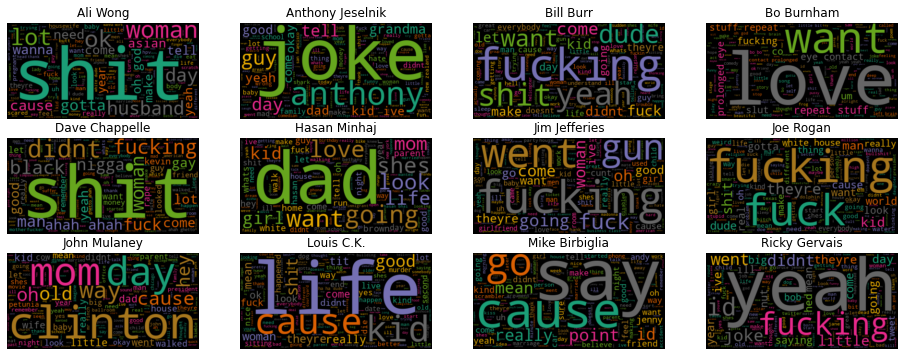

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# WordClouds for each comedian
for index, comedian in enumerate(dtmT.columns):
    wc.generate(stage4_cleaned.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

##### EDA 2. Number of unique words spoken by each comedian

In [35]:
# Selecting words with count > 0 from DTM 
uniqueWords = []
for comedian in dtmT.columns:
    uniques = dtmT[comedian].nonzero()[0].size
    uniqueWords.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, uniqueWords)), columns=['comedian', 'uniqueWords'])
unique_data = data_words.sort_values(by='uniqueWords')
unique_data

C:\Users\banak\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


,comedian,uniqueWords
1,Anthony Jeselnik,999
9,Louis C.K.,1096
6,Jim Jefferies,1274
3,Bo Burnham,1285
0,Ali Wong,1339
8,John Mulaney,1382
7,Joe Rogan,1392
4,Dave Chappelle,1403
10,Mike Birbiglia,1477
5,Hasan Minhaj,1532


##### EDA 3. Gathering extra data from Imdb for extra information such as how often unique words were used by each comedian

In [36]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
totalWords = []
for comedian in dtmT.columns:
    totals = sum(dtmT[comedian])
    totalWords.append(totals)
    
# Comedy special run times from IMDB, in minutes
runTimes = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['totalWords'] = totalWords
data_words['runTime'] = runTimes
data_words['words_per_minute'] = data_words['totalWords'] / data_words['runTime']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
extra_data = data_words.sort_values(by='words_per_minute')
extra_data

,comedian,uniqueWords,totalWords,runTime,words_per_minute
1,Anthony Jeselnik,999,3323,59,56.322034
3,Bo Burnham,1285,3459,60,57.650000
0,Ali Wong,1339,3594,60,59.900000
9,Louis C.K.,1096,3719,58,64.120690
4,Dave Chappelle,1403,4524,67,67.522388
6,Jim Jefferies,1274,5366,77,69.688312
11,Ricky Gervais,1605,5565,79,70.443038
10,Mike Birbiglia,1477,5357,76,70.486842
5,Hasan Minhaj,1532,5288,73,72.438356
8,John Mulaney,1382,4516,62,72.838710


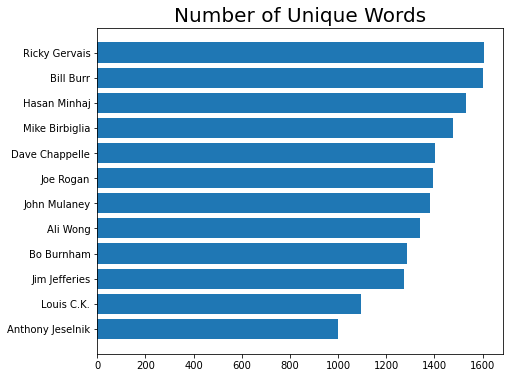

In [37]:
# Bar graphs representings number of unique words
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, unique_data.uniqueWords, align='center')
plt.yticks(y_pos, unique_data.comedian)
plt.title('Number of Unique Words', fontsize=20)


plt.show()

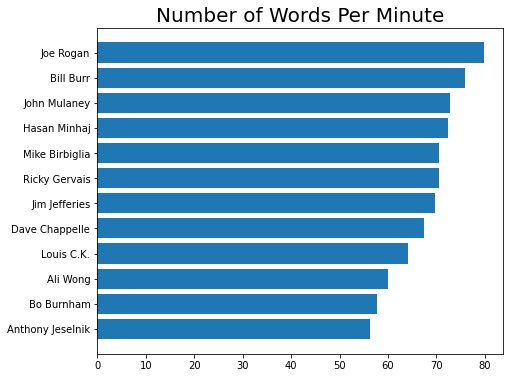

In [38]:
plt.subplot(1, 2, 2)
plt.barh(y_pos, extra_data.words_per_minute, align='center')
plt.yticks(y_pos, extra_data.comedian)
plt.title('Number of Words Per Minute', fontsize=20)
plt.show()

##### EDA 4. Swear Words

In [39]:
# Let's isolate just these bad words
swear_words = dtmT.transpose()[['fucking', 'fuck', 'shit']]
swear_data = pd.concat([swear_words.fucking + swear_words.fuck, swear_words.shit], axis=1)
swear_data.columns = ['fuck', 'shit']
swear_data

,fuck,shit
Ali,16,35
Anthony,15,9
Bill,107,64
Bo,37,7
Dave,65,46
Hasan,24,15
Jim,119,20
Joe,139,40
John,4,6
Louis,22,25


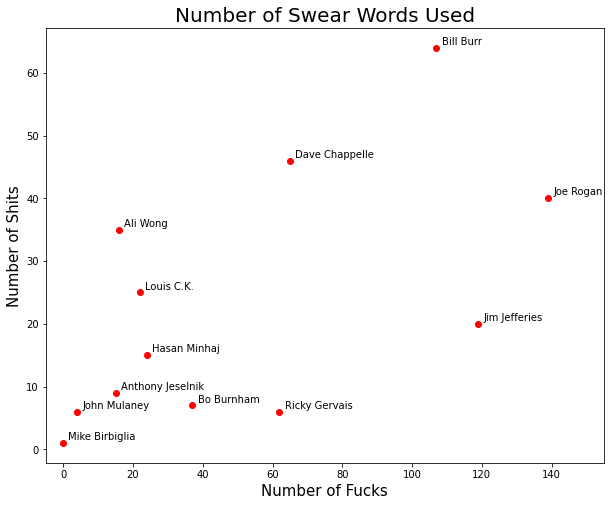

In [41]:
# scatter plot of swear words
plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(swear_data.index):
    x = swear_data.fuck.loc[comedian]
    y = swear_data.shit.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+1.5, y+0.5, full_names[index], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Swear Words Used', fontsize=20)
plt.xlabel('Number of Fucks', fontsize=15)
plt.ylabel('Number of Shits', fontsize=15)

plt.show()

# Sentiment Analysis

In [42]:
dataset

,transcript,Comedian
Ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
Anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
Bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
Bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
Dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
Hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
Jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
Joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
John,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
Louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [43]:
# Finding polarity and subjectivity of each routine
from textblob import TextBlob

p = lambda x: TextBlob(x).sentiment.polarity
s = lambda x: TextBlob(x).sentiment.subjectivity

dataset['polarity'] = dataset['transcript'].apply(p)
dataset['subjectivity'] = dataset['transcript'].apply(s)
dataset

,transcript,Comedian,polarity,subjectivity
Ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
Anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
Bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
Bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
Dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
Hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
Jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
Joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
John,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
Louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


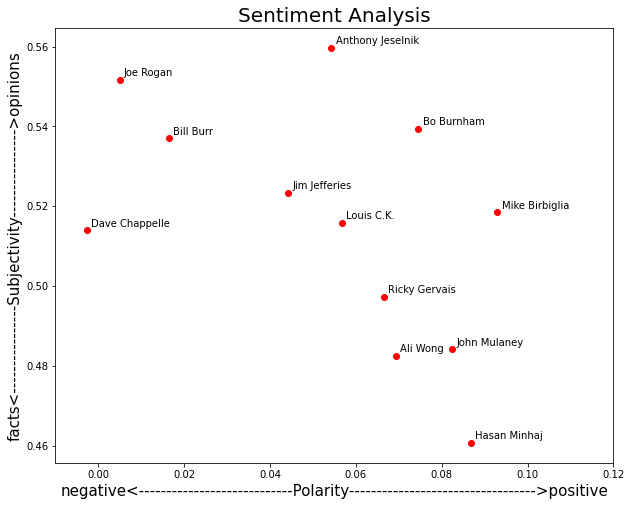

In [44]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(dataset.index):
    x = dataset.polarity.loc[comedian]
    y = dataset.subjectivity.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, dataset['Comedian'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('negative<----------------------------Polarity---------------------------------->positive', fontsize=15)
plt.ylabel('facts<----------------Subjectivity---------------->opinions', fontsize=15)

plt.show()

#### Sentiment of Routine Over Time
Checking if there is any fluctuation in polarity over time along each routine

In [45]:
# Split each routine into 10 parts
import numpy as np
import math

# This function breaks the text into n parts 
def parts_of_text(text, n):
    length = len(text) # length of text
    size = math.floor(length / n) # the size of each part
    start = np.arange(0, length, size) # the starting point of each part of text
    
    split_list = [] # To hold the parts with same size
    for i in range(n):
        split_list.append(text[start[i]:start[i]+size])
    return split_list

In [46]:
# Let's create a list to hold all of the pieces of text
list_parts = []
for t in dataset.transcript:
    split = parts_of_text(t,10) # Let us check with 10 parts
    list_parts.append(split)
    
list_parts

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [47]:
# Calculate the polarity for each piece of text

polarity_of_transcript = []
for lp in list_parts:
    polarity_part = []
    for p in lp:
        polarity_part.append(TextBlob(p).sentiment.polarity)
    polarity_of_transcript.append(polarity_part)
    
polarity_of_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035

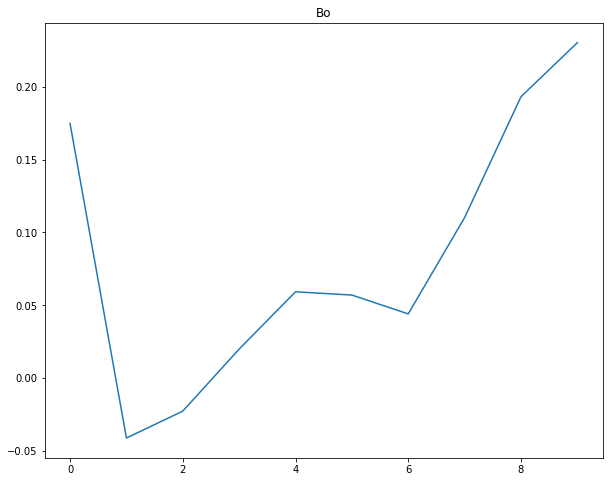

In [48]:

# Show the plot for one comedian
plt.plot(polarity_of_transcript[3])
plt.title(dataset['Comedian'].index[3])
plt.show()

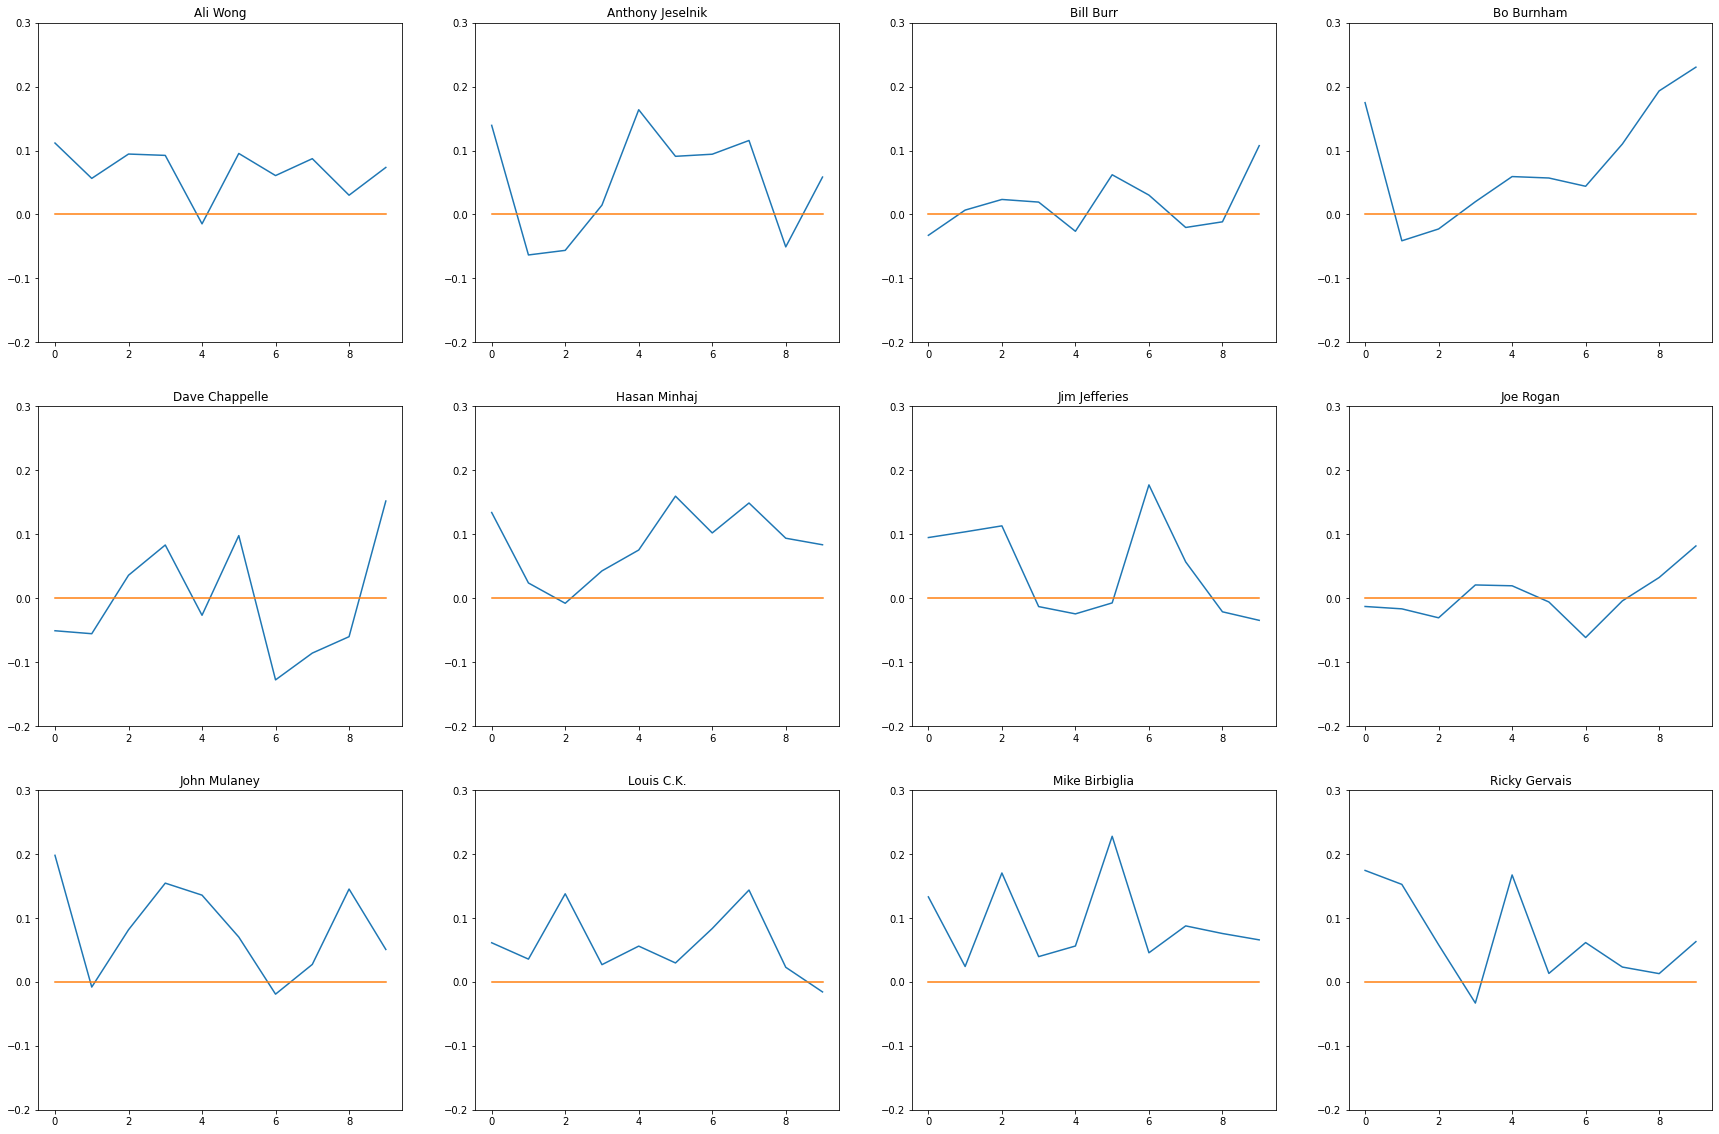

In [56]:
_# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [30, 20]

for i, comedian in enumerate(dataset.index):    
    plt.subplot(3, 4, i+1)
    plt.plot(polarity_of_transcript[i])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(dataset['Comedian'][i])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()